In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [101]:
df_raw = pd.read_csv('datastes/alzheimers_disease_data.csv')

df_raw.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [102]:
df_raw.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
df_raw = df_raw.drop(['PatientID', 'DoctorInCharge'], axis = 1)
df_raw.shape

(2149, 33)

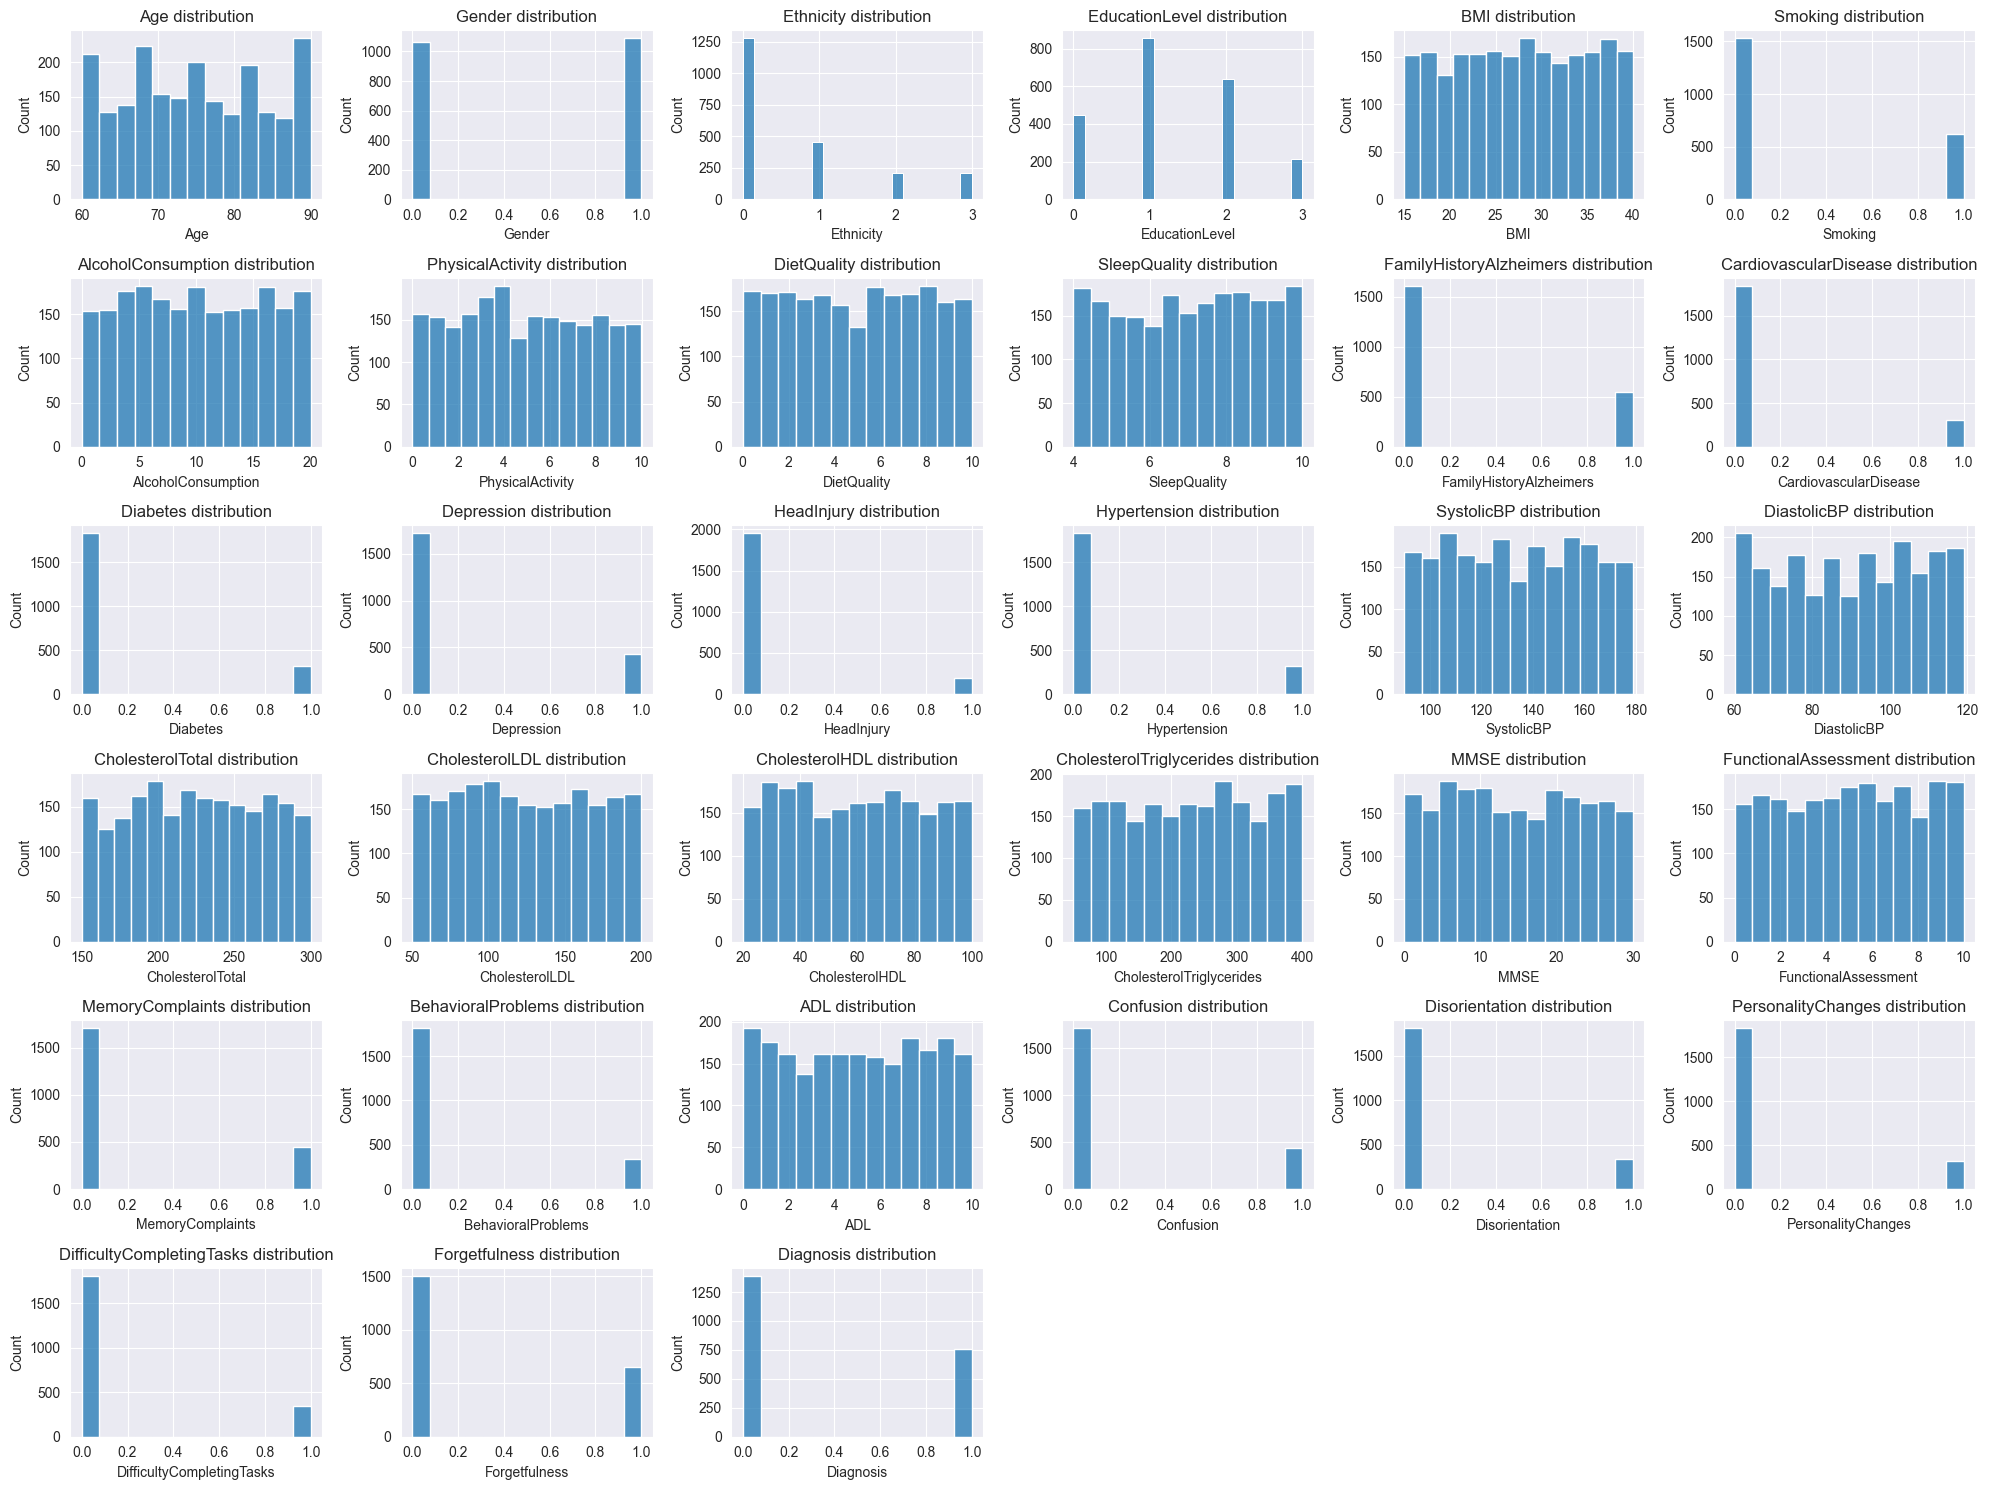

In [104]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df_raw.columns, 1):
    plt.subplot(int(len(df_raw.columns)**0.5)+1, int(len(df_raw.columns)**0.5)+1, i)
    sns.histplot(data=df_raw, x=column)
    plt.title(f'{column} distribution')

plt.tight_layout()
plt.show()

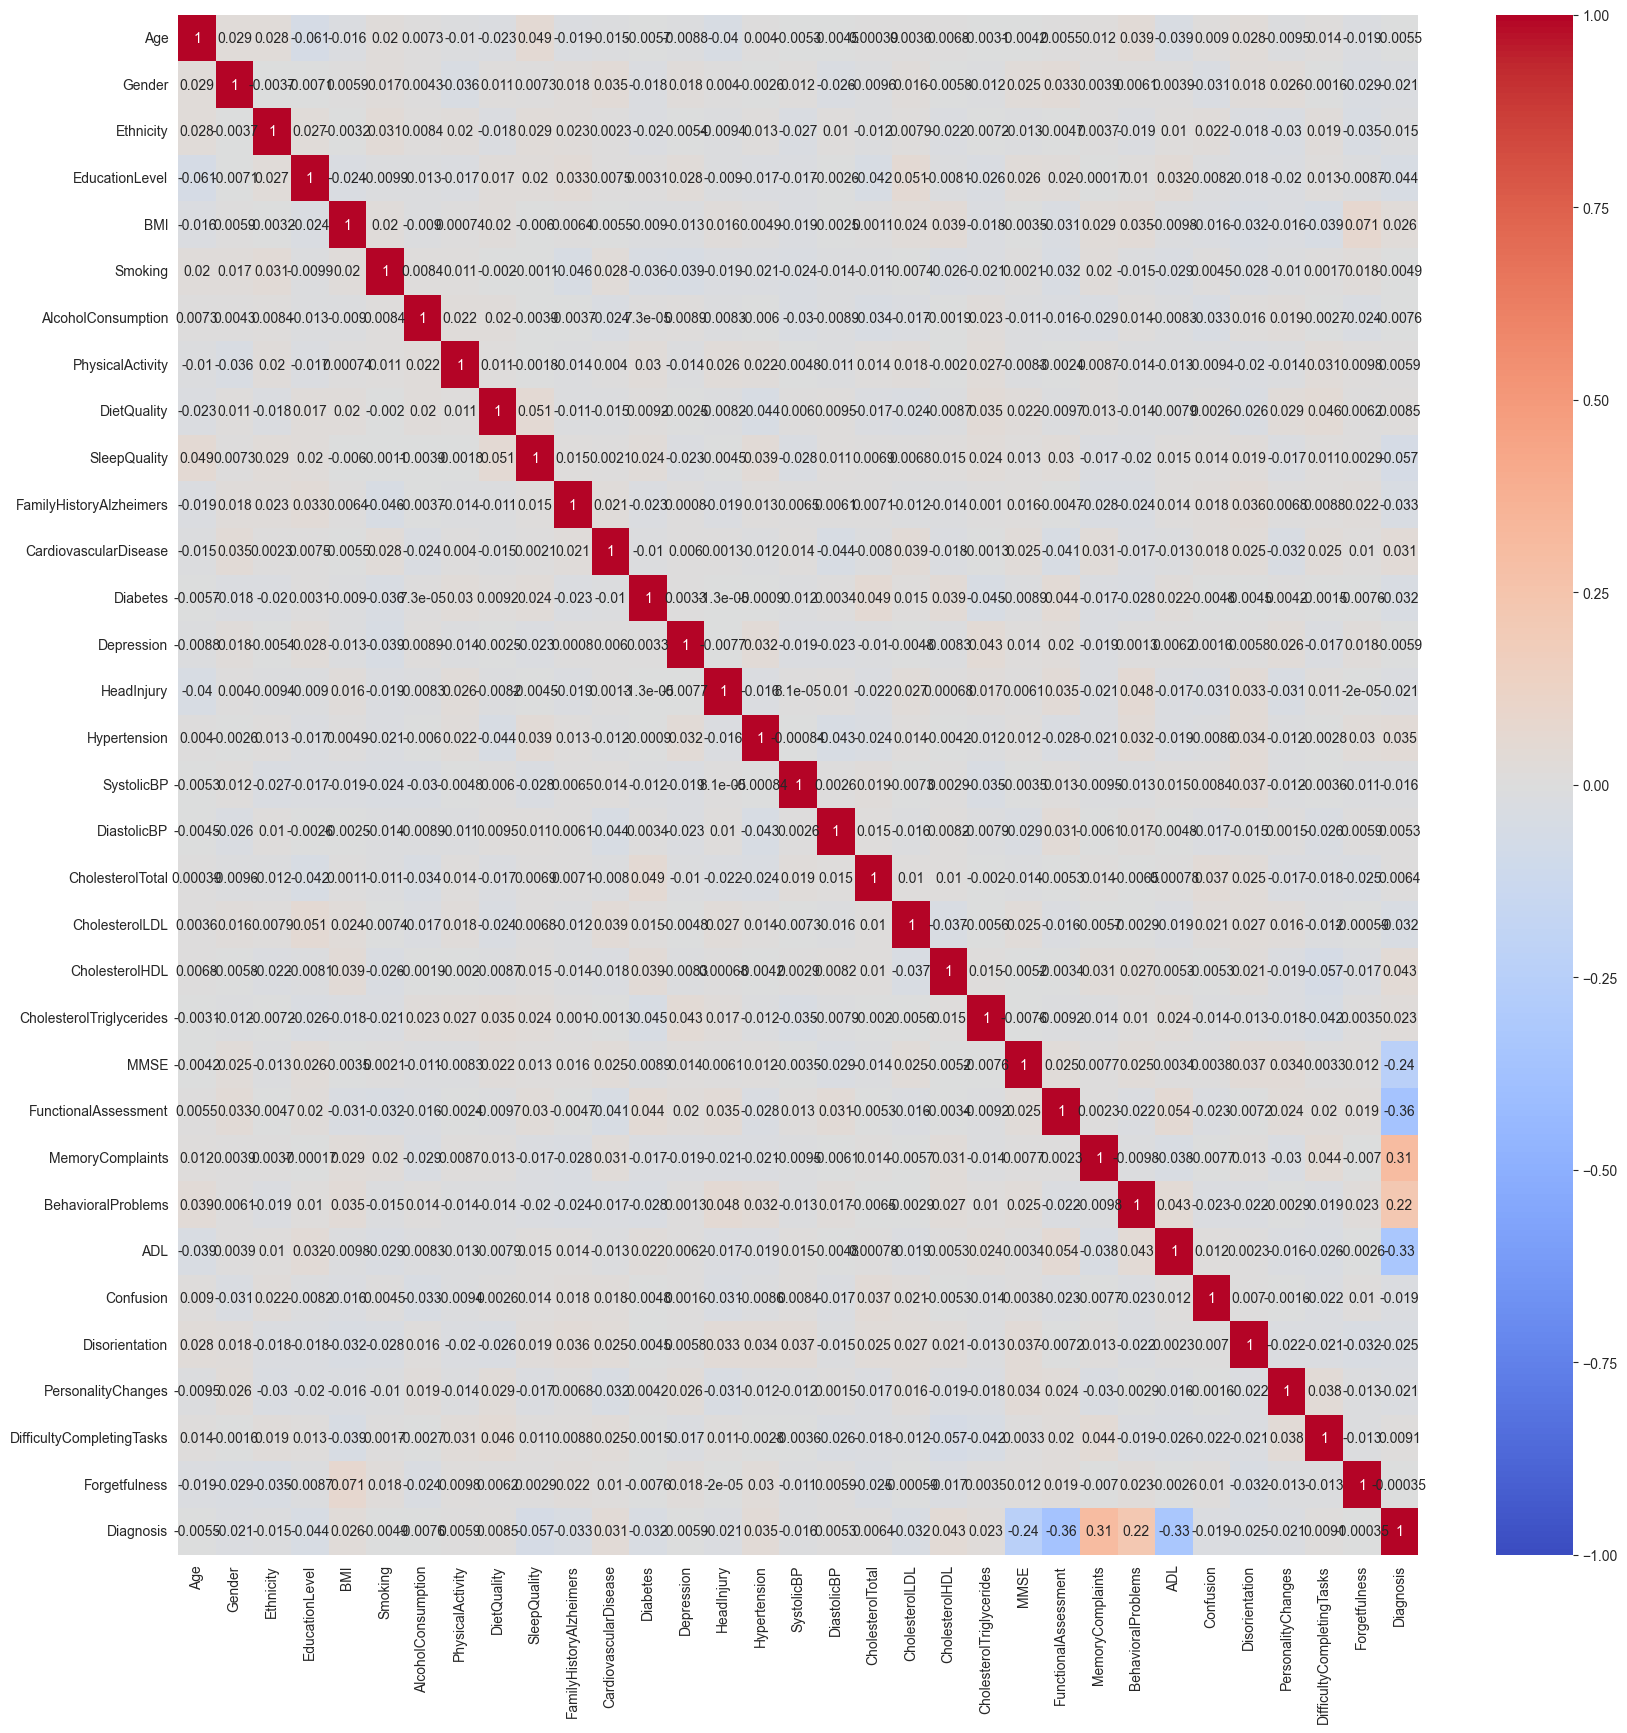

In [105]:
plt.figure(figsize=(20,20))
corr = df_raw.corr()
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
dummies1 = pd.get_dummies(df_raw.Ethnicity, prefix='Ethnicity', prefix_sep='-').astype(int)
dummies2 = pd.get_dummies(df_raw.EducationLevel, prefix='EducationLevel', prefix_sep='-').astype(int)

df = df_raw.drop(['Ethnicity', 'EducationLevel', 'Diagnosis'], axis = 1)
df = pd.concat((df, dummies1, dummies2, df_raw.Diagnosis), axis = 1)

df

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Forgetfulness,Ethnicity-0,Ethnicity-1,Ethnicity-2,Ethnicity-3,EducationLevel-0,EducationLevel-1,EducationLevel-2,EducationLevel-3,Diagnosis
0,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,...,0,1,0,0,0,0,0,1,0,0
1,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,...,1,1,0,0,0,1,0,0,0,0
2,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,...,0,0,0,0,1,0,1,0,0,0
3,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,...,0,1,0,0,0,0,1,0,0,0
4,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,...,0,1,0,0,0,0,1,0,0,1
2145,75,0,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,...,0,1,0,0,0,0,0,1,0,1
2146,77,0,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,...,0,1,0,0,0,0,1,0,0,1
2147,78,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,...,1,0,0,0,1,0,1,0,0,1


In [108]:
X = np.array(df.drop(['Diagnosis'], axis = 1))
Y = np.array(df.Diagnosis)

In [109]:
tr = StandardScaler()

X_tr = tr.fit_transform(X)
X_tr.shape

(2149, 38)

In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [111]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.l1 =  nn.Linear(38, 15)
        self.l2 = nn.Linear(15, 10)
        self.l3 = nn.Linear(10, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.l3(x)
        return x

In [112]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, Y, test_size=0.2, random_state=42)

print(f'Training size: {len(X_train)}, Test size: {len(X_test)}')

y_test[y_test==0].size

Training size: 1719, Test size: 430


277

In [114]:
from torch.utils.data import DataLoader, TensorDataset

X_test_tensor = torch.tensor(X_test).clone().detach().float().to(device)
y_test_tensor = torch.tensor(y_test).clone().detach().long().to(device)

dataset_test = TensorDataset(X_test_tensor, y_test_tensor)

dataloader_test = DataLoader(dataset_test)


def calculate_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in dataloader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = correct / total
    return accuracy

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 15]             585
              ReLU-2                   [-1, 15]               0
            Linear-3                   [-1, 10]             160
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 2]              22
Total params: 767
Trainable params: 767
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
Epoch 1, loss: 844.077466570423, test accuracy: 0.8186046511627907
Epoch 2, loss: 619.660301053198, test accuracy: 0.8395348837209302
Epoch 3, loss: 572.8415514924563, test accuracy: 0.8348837209302326
Epoch 4, loss: 542.2384492984274, test a

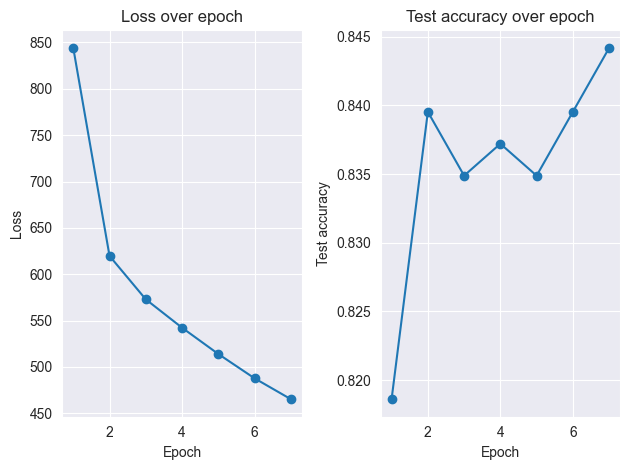

In [128]:
mlp = MLP().to(device)
torchsummary.summary(mlp, input_size=(38,))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

X_train_tensor = torch.tensor(X_train).clone().detach().float().to(device)
y_train_tensor = torch.tensor(y_train).clone().detach().long().to(device)

num_epochs = 7

losses = []

test_accuracy_list = []

for i in range(num_epochs):
    l = 0
    mlp.train()
    for j, x in enumerate(X_train_tensor, 0):
        optimizer.zero_grad()

        out = mlp(x)
        loss = criterion(out, y_train_tensor[j])
        loss.backward()

        optimizer.step()

        l+=loss.item()

    losses+=[l]
    test_accuracy = calculate_accuracy(mlp, dataloader_test)
    test_accuracy_list += [test_accuracy]
    print(f'Epoch {i+1}, loss: {l}, test accuracy: {test_accuracy}')

plt.subplot(1,2,1)
plt.plot(np.arange(1,len(losses)+1,1), losses, marker = 'o')
plt.title("Loss over epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,len(test_accuracy_list)+1,1), test_accuracy_list, marker = 'o')
plt.title("Test accuracy over epoch")
plt.xlabel("Epoch")
plt.ylabel("Test accuracy")

plt.tight_layout()
plt.show()

In [129]:
dataset = TensorDataset(X_train_tensor, y_train_tensor)

dataloader = DataLoader(dataset, batch_size=16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 15]             585
              ReLU-2                   [-1, 15]               0
            Linear-3                   [-1, 10]             160
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 2]              22
Total params: 767
Trainable params: 767
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
Epoch 1, loss: 71.78070777654648, test accuracy: 0.6441860465116279
Epoch 2, loss: 64.229790776968, test accuracy: 0.7511627906976744
Epoch 3, loss: 46.197528675198555, test accuracy: 0.8348837209302326
Epoch 4, loss: 38.5407282859087, test a

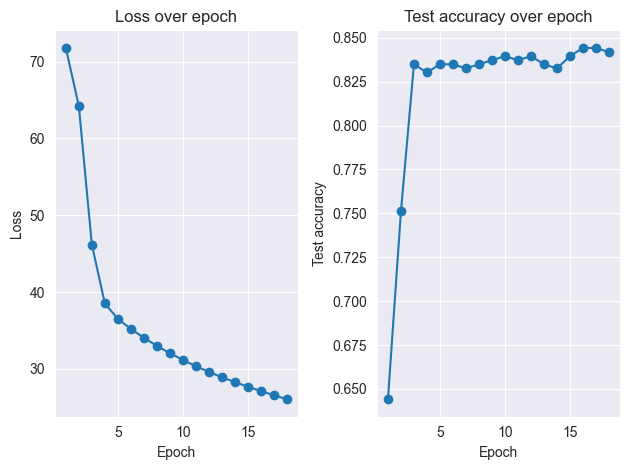

In [133]:
mlp2 = MLP().to(device)
torchsummary.summary(mlp2, input_size=(38,))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp2.parameters(), lr=0.001)

num_epochs = 18

losses = []

test_accuracy_list = []

for i in range(num_epochs):
    l = 0
    for j, (x, Y) in enumerate(dataloader, 0):
        optimizer.zero_grad()

        out = mlp2(x)
        loss = criterion(out, Y)
        loss.backward()

        optimizer.step()

        l+=loss.item()

    losses+=[l]
    test_accuracy = calculate_accuracy(mlp2, dataloader_test)
    test_accuracy_list += [test_accuracy]
    print(f'Epoch {i+1}, loss: {l}, test accuracy: {test_accuracy}')

plt.subplot(1,2,1)
plt.plot(np.arange(1,len(losses)+1,1), losses, marker = 'o')
plt.title("Loss over epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,len(test_accuracy_list)+1,1), test_accuracy_list, marker = 'o')
plt.title("Test accuracy over epoch")
plt.xlabel("Epoch")
plt.ylabel("Test accuracy")

plt.tight_layout()
plt.show()

In [134]:
print(f"MLP without batch, accuracy: {round(calculate_accuracy(mlp, dataloader_test), 2)}")
print(f"MLP with batch, accuracy: {round(calculate_accuracy(mlp2, dataloader_test), 2)}")

MLP without batch, accuracy: 0.84
MLP with batch, accuracy: 0.84


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(f"Logistic regression, accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Logistic regression, accuracy: 0.83


In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1, 1, 10],
    'gamma' : np.linspace(0.0001, 1, 100)
}

svc = SVC()

model_search = GridSearchCV(svc, param_grid, verbose=2)

model_search.fit(X_train, y_train)

print(f"Best SVM parameters with rbf kernel: {model_search.best_params_}")

svc = model_search.best_estimator_
y_pred = svc.predict(X_test)

print(f"SVM, accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.010199999999999999; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.010199999999999999; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.010199999999999999; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.010199999999999999; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.010199999999999999; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0203; total time=   0.0s
[CV] END ................................C=0.

In [139]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

param_grid = {
    'max_features' : [None, 'sqrt', 'log2'],
    'max_depth' : np.linspace(5,10,6).astype(int),
    'min_samples_split' : np.linspace(2,5,4).astype(int),
}

grid_search = GridSearchCV(dt, param_grid, verbose=2)

grid_search.fit(X_train, y_train)

print(f"Best decision tree parameters: {grid_search.best_params_}")

dt = grid_search.best_estimator_
y_pred = dt.predict(X_test)

print(f"Decision tree, accuracy: {round(accuracy_score(y_test, y_pred), 2)}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, max_features=None, min_sa